In [2]:
from imret.dataset import Dataset
from imret.color import ColorPalette

In [23]:
scenes = [(1, "wall"),
          (1, "floor"),
          (1, "window"),
          (1, "plant"),
          (1, "table"),
          (0, "door"),
          (1, "chair"),
            (0, "sign"),
            (0, "tree"),
            (1, "flower"),
            (1, "box"),
            (0, "sky"),
            (1, "poster"),
            (0, "grass"),
            (0, "bench"),
            (1, "vase"),
            (0, "building"),
            (0, "fence"),
            (1, "mirror"),
            (1, "curtain"),
            (0, "road"),
            (1, "armchair"),
            (1, "books"),
            (1, "ground"),
            (0, "car"),
            (1, "bottle"),
            (1, "basket"),
            (0, "streetlight"),
            (0, "balcony"),
            (1, "cupboard"),
            (1, "seats"),
            (1, "desk"),
            (0, "water"),
            (1, "bookcase"),
            (1, "coffee table"),
            (0, "van"),
            (0, "gate"),
            (0, "path"),
            (0, "airplane"),
            (1, "closet"),
            (0, "rock"),
            (1, "refrigerator")]
scenes = {v:k for k, v in scenes}

In [4]:
cp = ColorPalette('../data/query/name_conversion.csv')

In [5]:
!ls ../data/scene/train/outdoor/a_abbey_abbey_000006.jpg

../data/scene/train/outdoor/a_abbey_abbey_000006.jpg


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
import glob
import os
import numpy as np

In [61]:
def create_label(scale, ground_truth, scene, rgb=True):
    if rgb:
        label = np.zeros((w, h, 3), dtype=np.uint8)
    else:
        label = np.zeros((w, h), dtype=np.uint8)

    for (classname, contour) in ground_truth.items():
        classname = classname.replace('cars', 'car').replace('rocks', 'rock').replace('flowers', 'flower')
        try:
            color = cp[classname] if rgb else cp.class_id(classname)
        except ValueError:
            continue
        
        if scenes[classname] != scene:
            color = cp["__background__"]
        cnt = contour * scale
        cv2.drawContours(label, [cnt.astype(np.int32)], -1, color, -1)
    return label

In [65]:
scene_type = {'outdoor': 0, 'indoor': 1}
for scene, scene_code in scene_type.items():
    for trainset in ['train', 'test']:
        dset = Dataset('../data/datasets/', trainset, '../data/images/')
        fnames = glob.glob(os.path.join('../data/scene',trainset, scene, "*.jpg"))
        for fname in fnames:
            imname = os.path.basename(fname)
            target_name = os.path.join('../data/scene/segmentation', scene, trainset, imname.replace(".jpg", ".png"))
            if os.path.exists(target_name):
                continue
                
            image = dset.get_im_array(imname)
            if image is None:
                continue
            w, h = (384, 384)
            w1, h1 = image.shape[:2]
            fy = w / float(w1)
            fx = h / float(h1)
            scale = np.array([fx, fy])
            ground_truth = dset.ground_truth(imname)
            label = create_label(scale, ground_truth, scene=scene_code)
            cv2.imwrite(target_name, label)

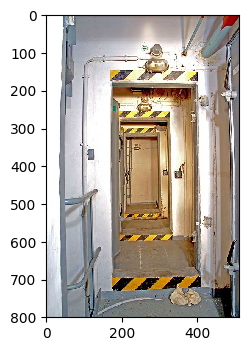

In [42]:
imname = 'a_airlock_air_lock_000001.jpg'
image = dset.get_im_array(imname)
plt.imshow(image[:, :, (2, 1, 0)])

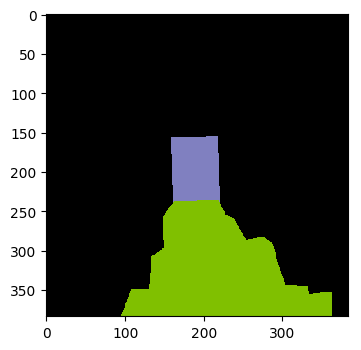

In [54]:
import cv2
plt.imshow(create_label(scale, ground_truth, scene=scene_code))

In [57]:
cp['door']

array([128,  64,   0])